<!--NOTEBOOK_HEADER-->
*Questo notebook, sulla base dei dati pubblicati dalla Protezione Civile, esegue un fit non lineare al modello logistico e quindi confronta la funzione ottenuta con l'andamento nazionale del contagio Covid-19.<br>
Si veda [matematica.unibocconi.it](http://matematica.unibocconi.it/) per l'articolo completo.*

<p><i>Preleva questo notebook da GitHub oppure clic sul pulsante sopra</i></p> <a href="https://github.com/lrnzr/didatticaCovid19/blob/master/andamentoITALIA.ipynb"><img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download notebook da GitHub"></a><br>
<p><i>Per una consultazione interattiva</i></p> <a href="https://mybinder.org/v2/gh/lrnzr/didatticaCovid19/master"><img align="left" src="https://static.mybinder.org/badge_logo.svg" alt="Vai al sito MyBinder.org" title="Vai al sito MyBinder.org"></a></p>

# Andamento complessivo nazionale Covid-19 e modello logistico

Librerie importate

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Definizione della funzione logistica (il modello epidemilogico)
\begin{equation}
f(t)=\frac{a}{1+b e^{-c t}}
\end{equation}
Il fit non lineare sui dati regionali permette di determinare i valori ottimali dei parametri *a*, *b*, *c*. 

In [8]:
# definizione della funzione logistica
def logistica(t, a, b, c):
    return a / (1 + b * np.exp(-c * t))

Il nome del file è composto dal prefisso "datiNazionali" e dalla data in formato ISO. A seconda del file dati da elaborare presente nella cartella di questo notebook, aggiornare eventualmente la data.

In [9]:
# modificare tale data
dataISO = '20200601'
# modificare eventualmente il nome del file
nomeFile = 'datiNazionali' + dataISO

# utilizzata nel grafico finale
codificaItaliana = dataISO[6:] + '-' + dataISO[4:6] + '-' + dataISO[:4]

Viene aperto e letto il file CSV dei dati nazionali assegnandone i valori all'array ydata e in corrisponednza si definisce il numero dei giorni trascorsi dal 24 di febbraio.

In [10]:
cols = ["totale_casi"]
df = pd.read_csv(nomeFile + '.csv', sep = ',', usecols = cols)
dff = df.to_numpy()
ydata = dff[:, 0]

numGiorni = len(df)
giorni = np.linspace(1, numGiorni, numGiorni)

In base al modello logistico si esegue il fit non lineare e quindi i valori dei parametri *a*, *b*, *c* formattati vanno a costituire la label per il grafico finale.

In [11]:
param, covarianza = curve_fit(logistica, giorni, ydata)
labs = 'fit: a = %5.2f,\nb = %5.2f, c = %5.2f' % tuple(param)

Istruzioni per creare il grafico

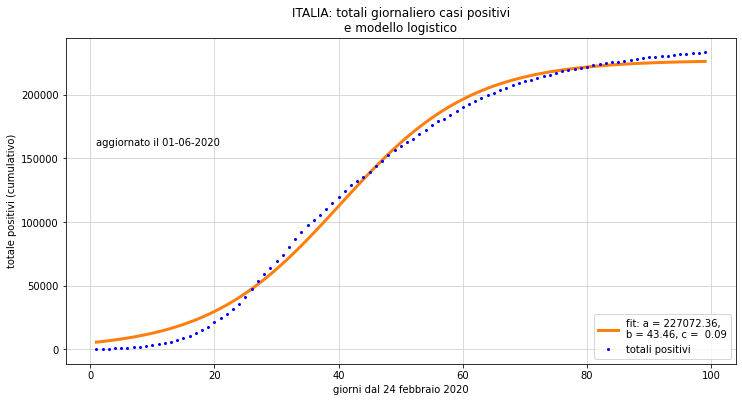

In [12]:
# predispone la figura e il grafico dei singoli dati
plt.rcParams['figure.figsize'] = [12, 6]
# plt.rcParams['figure.dpi'] = 80
fig, ax = plt.subplots()
# grafico della curva derivata
plt.plot(giorni, logistica(
    giorni, param[0], param[1], param[2]), 'C1', linewidth=3., label=labs)
# grafico dei dati
ax.plot(giorni, ydata, 'ob', markersize=2, label='totali positivi')
ax.set_title('ITALIA: totali giornaliero casi positivi\ne modello logistico')
ax.set_xlabel('giorni dal 24 febbraio 2020')
ax.set_ylabel('totale positivi (cumulativo)')
ax.grid(color='.85', linestyle='-', linewidth=1)
ax.text(1, 160000, 'aggiornato il ' + codificaItaliana)

plt.legend(loc='lower right')
plt.show()
# plt.savefig('Italia.pdf')